#World War 2 Aerial Bombing Operation With EDA

**INTRODUCTION**

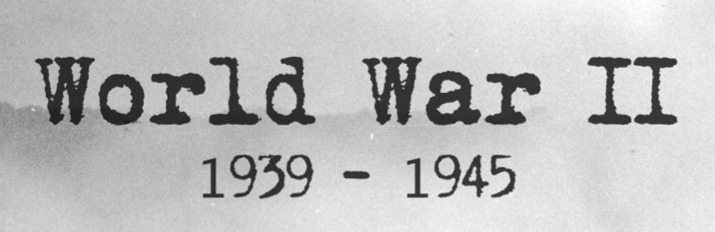



1. Heyy Guys,I hope you are doing fine!!
2. In this Colab NoteBook,We use a Data source that are **Aerial
   Bombing Operation**
3. We will start with **Data Desciption & Data Cleaning**,then we will
   visualize our data to understand the better .This process can be calles **EDA** (Exploratory data analysis)
4. After this point, I will used acronym ww2 for World War 2



**CONTENT**

*   Load the data
*   Data Description
*   Data Cleaning
*   Data Visualization






In [37]:
!pip  install plotly

*IMPORTING LIBRARIES*

In [35]:
import pandas as pd #data preprocessing,load csv file.
import numpy as np #for linear algebra.
import matplotlib.pyplot as plt #visualization library
import seaborn as sns #visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True)
import plotly as py #visualization library
import plotly.graph_objs as go # plotly graphical object
%matplotlib inline
import os #for Operating System, input data file is available
import warnings #ignore filters
warnings.filterwarnings("ignore") #if ther is warning after some code it will ignore automatically.

*Loading the Data*

**Aerial Bombing Operation Data**


*   As I Mention in the Introduction,we used the data from Aerial
    Bombing Operation Data
*   Aerial Bombing Operation in WW2
  * Shortly this data include bombing operation,For example USA who used ponte olivo airfield bomb germany (Berlin) with A36 AIRCRAFT in 1945






In [3]:
#bombing data
bdata = pd.read_csv("/content/operations.csv")
bdata

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,178738,2/16/1945,CBI,USA,10 AF,89 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35815.0
178277,178739,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35020.0
178278,178740,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35022.0
178279,178741,2/16/1945,PTO,NEW ZEALAND,RNZAF,NO. 22 SQUADRON RNZAF,F4U,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8000.0,4.0,NaN,NaN,NaN


** Data Description**

     I only explain data features that we will used in this colab NoteBook
**Areial Bombing Data Description**
    

* Mission Date: Date of mission   
*Theater of Operations: Region in which active military operations are in progress; "the army was in the field awaiting action"; Example: "he served in the Vietnam theater for three years"  
*Country: Country that makes mission or operation like USA  
*Air Force: Name or id of air force unity like 5AF  
*Aircraft Series: Model or type of aircraft like B24  
*Callsign: Before bomb attack, message, code, announcement, or tune that is broadcast by radio.  
*Takeoff Base: Takeoff airport name like Ponte Olivo Airfield  
*Takeoff Location: takeoff region Sicily  
*Takeoff Latitude: Latitude of takeoff region  
*Takeoff Longitude: Longitude of takeoff region  
*Target Country: Target country like Germany  
*Target City: Target city like Berlin  
*Target Type: Type of target like city area  
*Target Industry: Target industy like town or urban  
*Target Priority: Target priority like 1 (most)  
*Target Latitude: Latitude of target  
*Target Longitude: Longitude of target  


  



    

**Data Cleaning**
  *  Aerial bombing data includes lots of NaN value.Instead of using them,I drop some NaN values.It does not only remove the uncertanity but it is easy visualization process
  *   Drop countries that are NaN
  *   Drop is target longitude is NaN
  *   Drop if takeoff logitude is NaN
  *   Drop unused features

In [4]:
#Drop countries that are NaN
bdata = bdata[pd.isna(bdata.Country)==False]
#Checking that values are drop
bdata.isna().sum()

Mission ID                                    0
Mission Date                                  0
Theater of Operations                      2238
Country                                       0
Air Force                                    50
Unit ID                                   75582
Aircraft Series                             116
Callsign                                 126473
Mission Type                              79308
Takeoff Base                             123111
Takeoff Location                         123156
Takeoff Latitude                         123513
Takeoff Longitude                        123514
Target ID                                 50865
Target Country                              597
Target City                                 964
Target Type                                8199
Target Industry                           51795
Target Priority                           36243
Target Latitude                            5951
Target Longitude                        

In [5]:
#Drop if Target Longitude is NaN
bdata=bdata[pd.isna(bdata["Target Longitude"])==False]
#Checking that values are drop
bdata.isna().sum()

Mission ID                                    0
Mission Date                                  0
Theater of Operations                       406
Country                                       0
Air Force                                    50
Unit ID                                   69727
Aircraft Series                             105
Callsign                                 120500
Mission Type                              73354
Takeoff Base                             117201
Takeoff Location                         117235
Takeoff Latitude                         117578
Takeoff Longitude                        117579
Target ID                                 50708
Target Country                              533
Target City                                   6
Target Type                                7138
Target Industry                           51622
Target Priority                           34550
Target Latitude                               0
Target Longitude                        

In [6]:
#Drop if Takeoff Longitude is NaN
bdata=bdata[pd.isna(bdata["Takeoff Longitude"])==False]
#Checking that values is drop or not
bdata.isna().sum()


Mission ID                                  0
Mission Date                                0
Theater of Operations                     179
Country                                     0
Air Force                                  50
Unit ID                                    77
Aircraft Series                            27
Callsign                                 2932
Mission Type                             2405
Takeoff Base                                0
Takeoff Location                            0
Takeoff Latitude                            0
Takeoff Longitude                           0
Target ID                                1952
Target Country                            235
Target City                                 3
Target Type                              2340
Target Industry                          2861
Target Priority                          2326
Target Latitude                             0
Target Longitude                            0
Altitude (Hundreds of Feet)       

In [7]:
#drop unused feature
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']
bdata.drop(drop_list, axis=1,inplace = True)

In [8]:
bdata.columns

Index(['Mission Date', 'Theater of Operations', 'Country', 'Air Force',
       'Aircraft Series', 'Callsign', 'Takeoff Base', 'Takeoff Location',
       'Takeoff Latitude', 'Takeoff Longitude', 'Target Country',
       'Target City', 'Target Type', 'Target Industry', 'Target Priority',
       'Target Latitude', 'Target Longitude'],
      dtype='object')

In [45]:
bdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2942 entries, 0 to 178202
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mission Date           2942 non-null   object 
 1   Theater of Operations  2763 non-null   object 
 2   Country                2942 non-null   object 
 3   Air Force              2892 non-null   object 
 4   Aircraft Series        2915 non-null   object 
 5   Callsign               10 non-null     object 
 6   Takeoff Base           2942 non-null   object 
 7   Takeoff Location       2942 non-null   object 
 8   Takeoff Latitude       2942 non-null   object 
 9   Takeoff Longitude      2942 non-null   float64
 10  Target Country         2707 non-null   object 
 11  Target City            2939 non-null   object 
 12  Target Type            602 non-null    object 
 13  Target Industry        81 non-null     object 
 14  Target Priority        616 non-null    object 
 15  Ta

<Axes: >

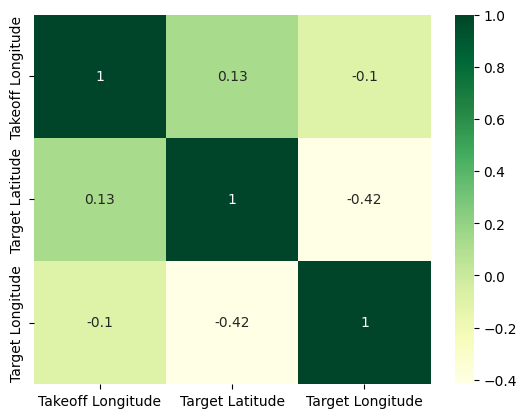

In [51]:
sns.heatmap(bdata.corr(),annot=True,cmap="YlGn")

**Data Visualization**
  *   Lets start with basic of visualization that is understanding the data
  *   How many countries which attacks?
  *   Top Target countries
  *   Top 10 aircraft series
  *   Bombing paths
  *   Theater of Operations

USA              1895
GREAT BRITAIN     931
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64


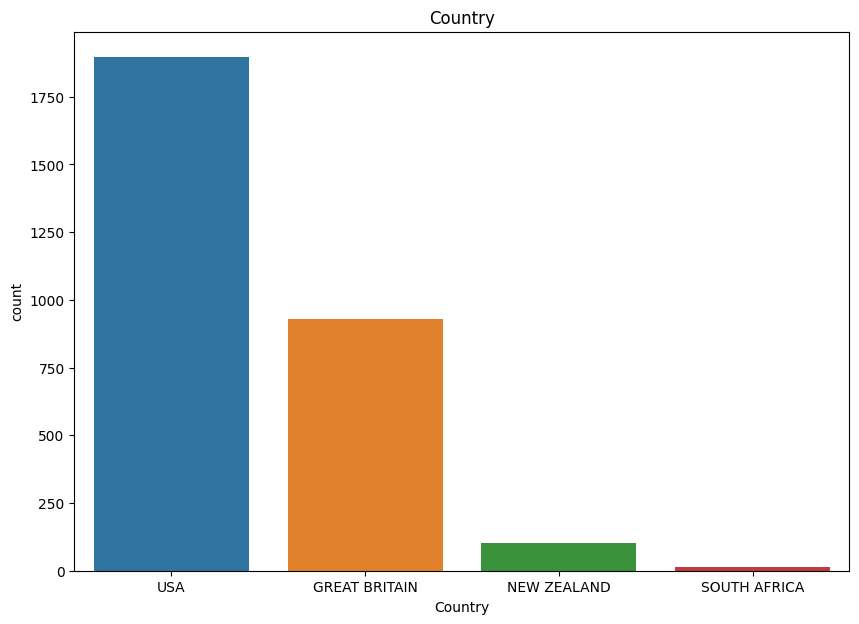

In [10]:
#Country
print(bdata["Country"].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(x="Country",data=bdata)
plt.title("Country")
plt.show()

ITALY      1114
BURMA       335
LIBYA       272
GREECE      228
TUNISIA     113
EGYPT        80
JAPAN        71
CHINA        52
SICILY       46
GERMANY      42
Name: Target Country, dtype: int64


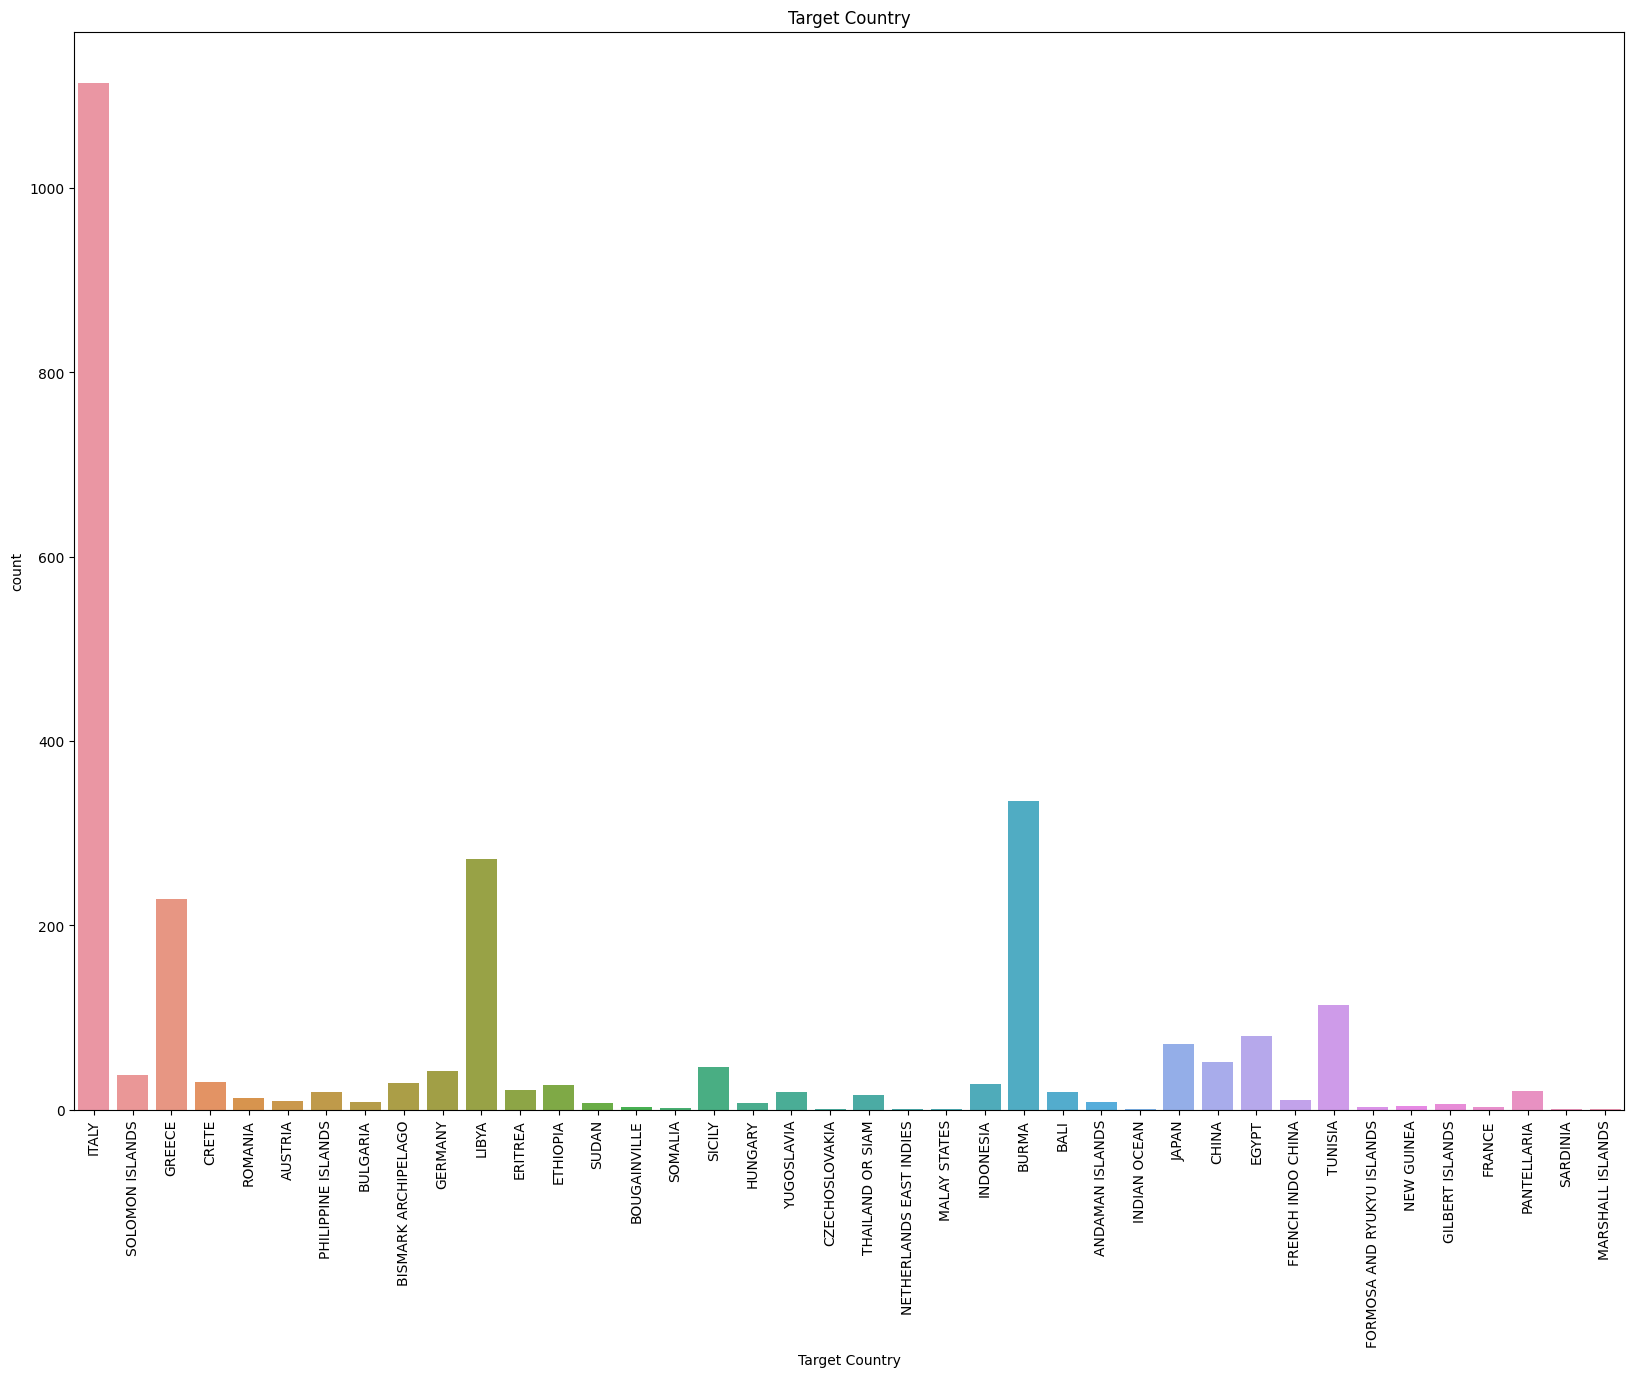

In [11]:
#Top target countries
print(bdata["Target Country"].value_counts()[:10])
plt.figure(figsize=(20,14))
sns.countplot(x="Target Country",data=bdata)
plt.xticks(rotation=90)
plt.title("Target Country")
plt.show()

A36             990
LIB             532
B25             416
B24             337
BLEN            180
WELL            129
B17             119
PV-1 VENTURA     70
WHIT             32
HALI             18
Name: Aircraft Series, dtype: int64


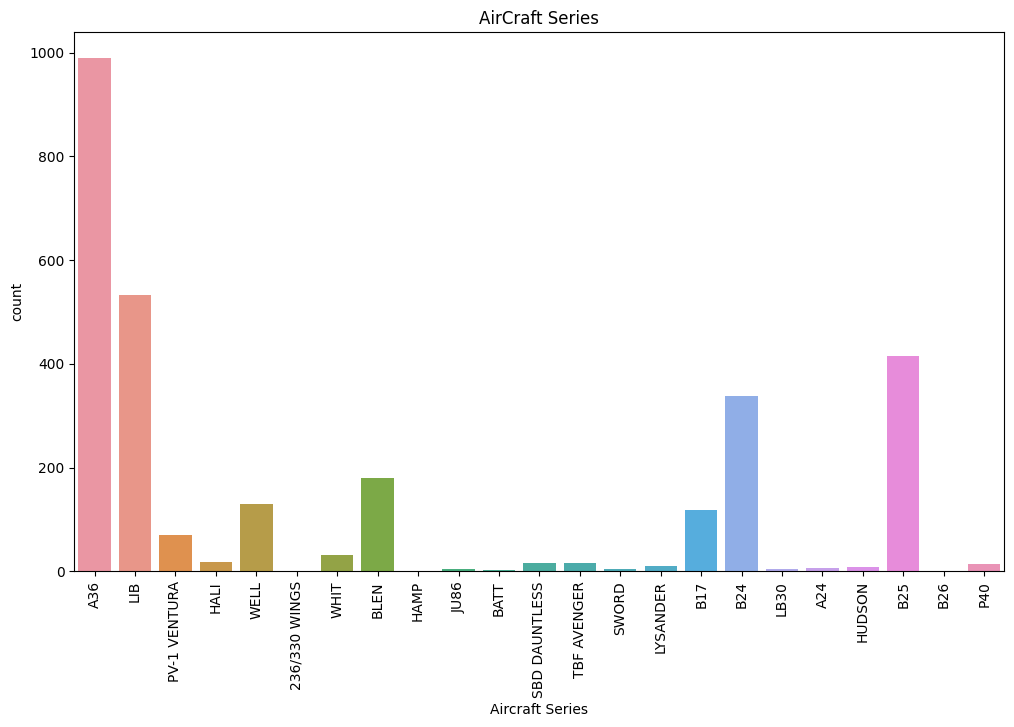

In [22]:
#Top 10 aircraft series
print(bdata["Aircraft Series"].value_counts()[:10])
plt.figure(figsize=(12,7))
sns.countplot(x="Aircraft Series", data = bdata)
plt.title("AirCraft Series")
plt.xticks(rotation=90)
plt.show()

 **Most used aircraft: A36** 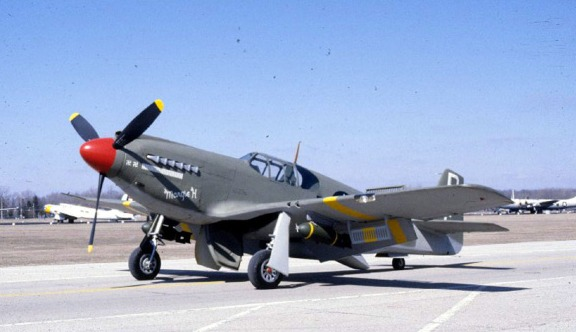

MTO            1991
CBI             425
PTO             247
ETO              63
EAST AFRICA      37
Name: Theater of Operations, dtype: int64


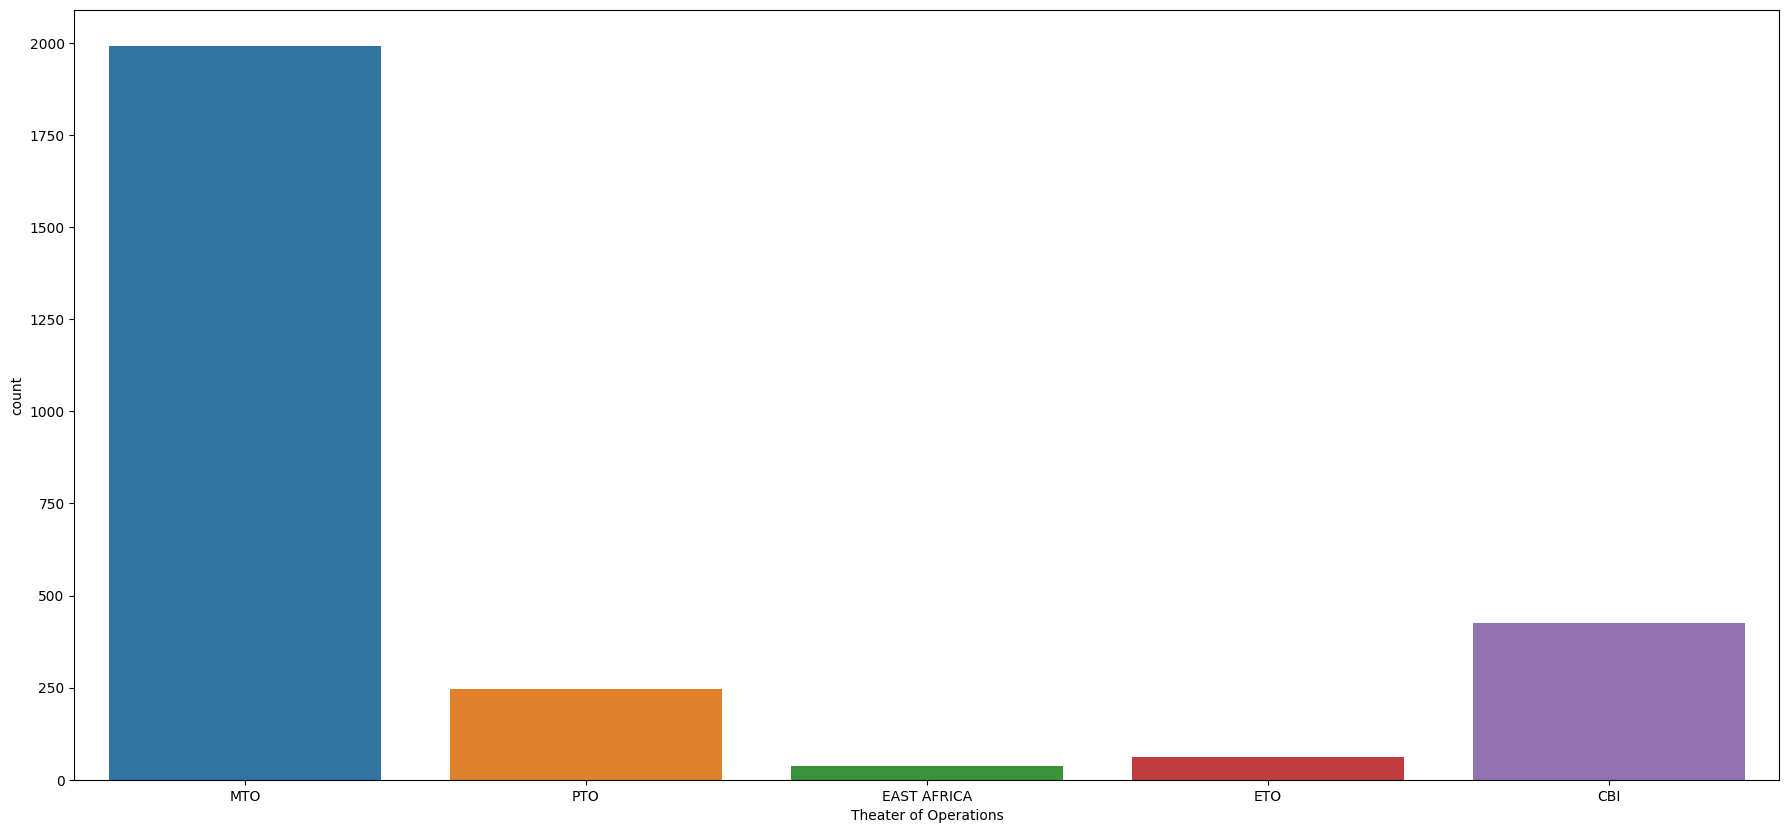

In [41]:
#Theater of Operations
print(bdata['Theater of Operations'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot( data=bdata,x='Theater of Operations')
plt.show()


**CONCLUSION**
 *  In this We do that data cleaning and data ploting usiing differnt graph (Aerial bombing operation dataset)
 *  And had a corelation using heatmap
 *  In this tutorial, I want ot make tutorial about EDA and make some visualization before it.
 *  We learn how to make map plots with pyplot.